# Analizando el modelo Sugarscape.
**A continuación se presenta un análisis de los datos arrojados por algunos experimentos realizados con el modelo de Sugarscape. Veremos la relación de la variable de dotación inicial (maximum-sugar-endowment y minimum-sugar-endowment) y las métricas del índice GINI, la cantidad de decesos por hambre (starvation) y la riqueza per cápita**
## Importando bibliotecas

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()

# Métodos auxiliares

In [2]:
def limpiar_dataframe(df):
    limpiado = df.drop(columns='visualization')
    limpiado = limpiado.drop(limpiado[limpiado['[step]'] == 0].index) # aquellas runs que no se iniciaron
    limpiado = limpiado.drop(columns='[run number]')
    limpiado = limpiado.drop(columns='initial-population') #poblacion fija
    limpiado = limpiado.drop(columns='[step]') # en este punto, todas las runs son validas y llegaron a la it final
    try:
        limpiado = limpiado.drop(columns='taxation')
        limpiado = limpiado.drop(columns='redistribution')
    except:
        return limpiado
        
    return limpiado
    
def mapa_calor(df,medida,titulo,ruta):
    datos_aplanados = df.pivot(index="minimum-sugar-endowment", columns="maximum-sugar-endowment", values=medida)
    plt.figure(figsize=(12, 8)) 
    sns.heatmap(datos_aplanados, cmap='viridis',annot=False)
    plt.text(0, -0.5, titulo, fontsize=12, color='black', ha='left')
    plt.savefig(ruta,dpi=300, bbox_inches='tight')
    plt.show()
    

# Mapas de calor sobre el índice GINI, decesos por hambruna y riqueza per cápita

In [3]:
df = pd.read_csv('productividad/productivity.csv')
df.head()

,[run number],maximum-sugar-endowment,minimum-sugar-endowment,visualization,initial-population,[step],avg-gini,starvation,avg-productivity,total-wealth
0,1,0,0,color-agents-by-decile,400,0,0.0,0,0.0,0
1,2,0,10,color-agents-by-decile,400,0,0.0,0,0.0,0
2,3,0,20,color-agents-by-decile,400,0,0.0,0,0.0,0
3,4,0,30,color-agents-by-decile,400,0,0.0,0,0.0,0
4,5,0,40,color-agents-by-decile,400,0,0.0,0,0.0,0


In [4]:
df = limpiar_dataframe(df)
df

,maximum-sugar-endowment,minimum-sugar-endowment,avg-gini,starvation,avg-productivity,total-wealth
21,10,0,0.505955,6322,41.390950,16034
42,20,0,0.476398,5440,42.374600,16328
43,20,10,0.467143,4745,45.700650,18057
63,30,0,0.476218,4761,44.283125,17857
64,30,10,0.456689,4238,45.599350,18374
...,...,...,...,...,...,...
435,200,150,0.190918,400,171.173825,67885
436,200,160,0.199800,372,176.193525,68841
437,200,170,0.185262,346,178.665475,71519
438,200,180,0.176211,325,187.057250,74191


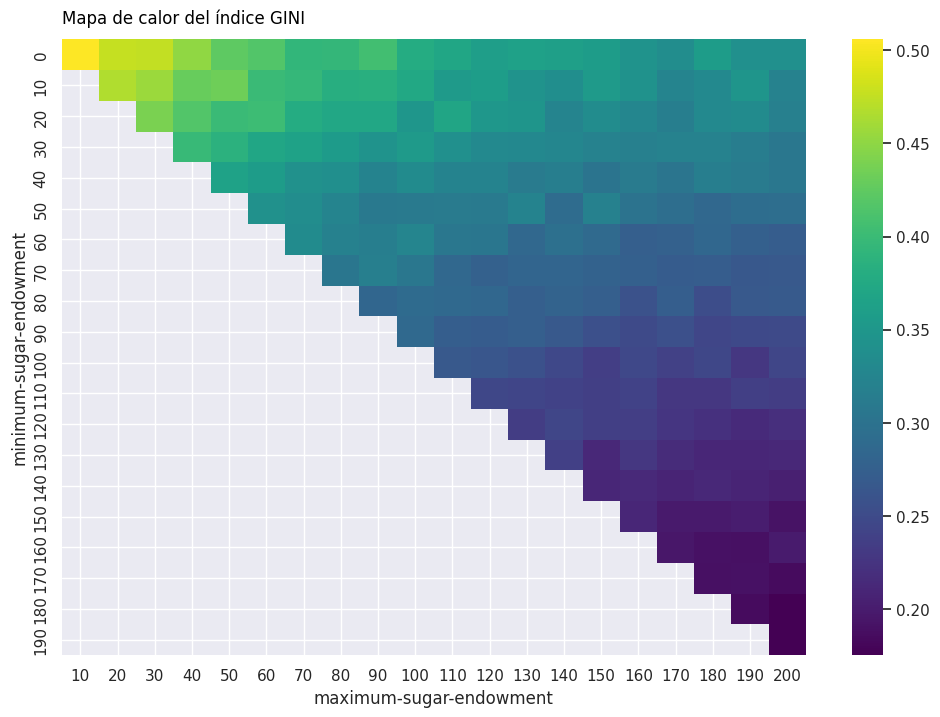

In [5]:
mapa_calor(df,"avg-gini","Mapa de calor del índice GINI", 'figuras/GINI.png')

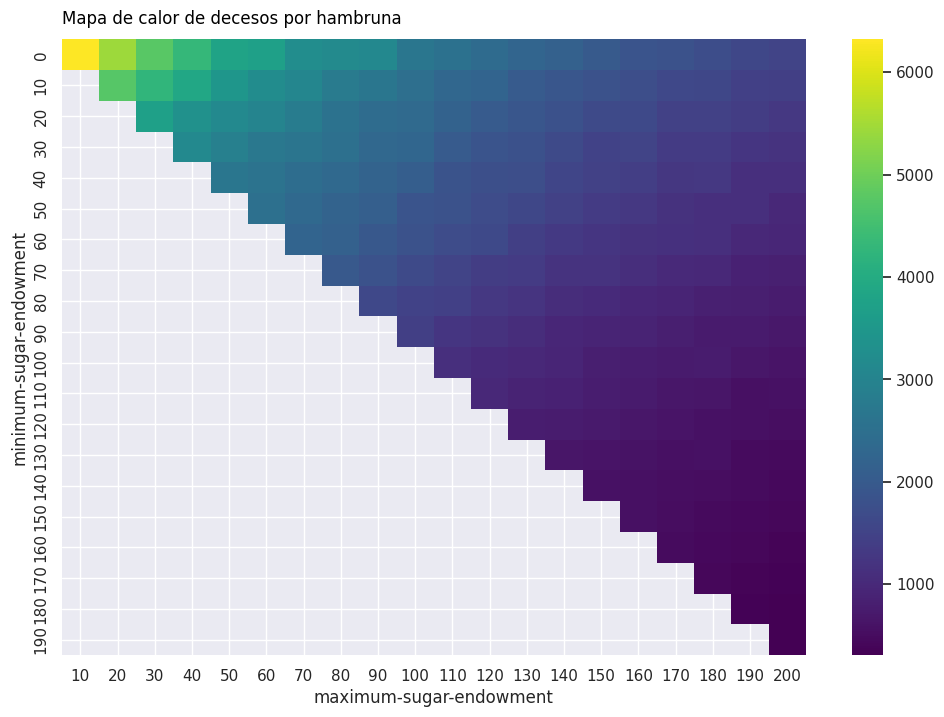

In [6]:
mapa_calor(df,"starvation","Mapa de calor de decesos por hambruna", 'figuras/Hambruna.png')

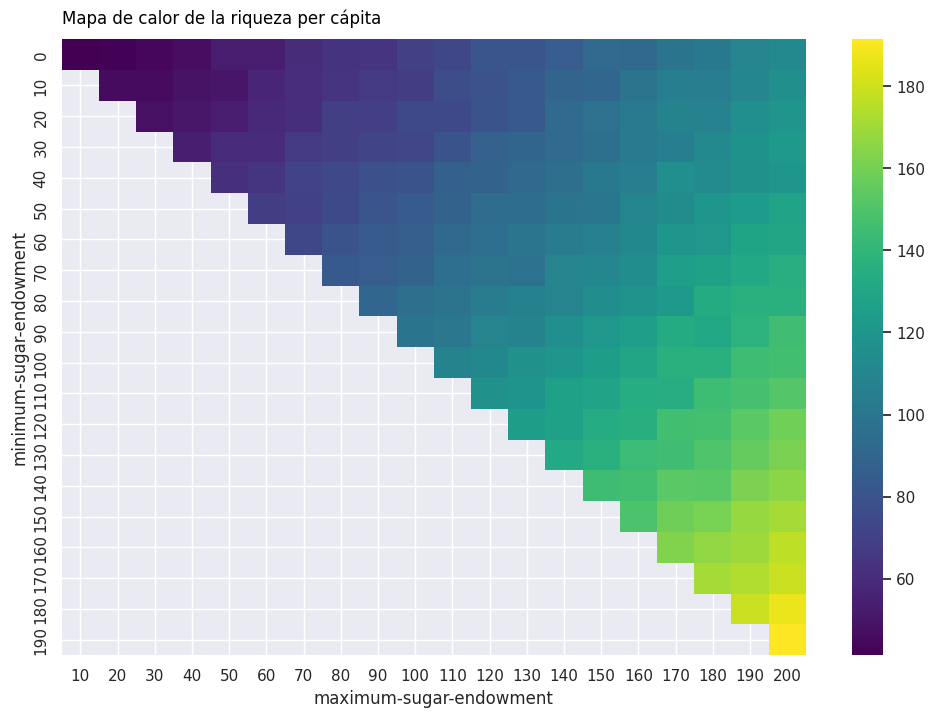

In [7]:
mapa_calor(df,"avg-productivity","Mapa de calor de la riqueza per cápita", 'figuras/Riqueza.png')

In [8]:
correlacion = df['avg-gini'].corr(df['avg-productivity'])
print(f"La correlación entre el coeficiente GINI y la productividad es de: {correlacion}")
correlacion = df['avg-gini'].corr(df['starvation'])
print(f"La correlación entre el coeficiente GINI y starvation es de: {correlacion}")
correlacion = df['starvation'].corr(df['avg-productivity'])
print(f"La correlación entre starvation y la productividad es de: {correlacion}")


La correlación entre el coeficiente GINI y la productividad es de: -0.9387311587959669
La correlación entre el coeficiente GINI y starvation es de: 0.9467550731082013
La correlación entre starvation y la productividad es de: -0.9068587751699908


# Políticas de recaudación y redistribución
**Dados las diferentes formas de recaudar y redistribuir la riqueza, nos interesa saber cuál es aquella que disminuye la desigualdad y mantiene la mayor productividad. Los anteriores resultados se realizaron sin políticas de redistribución ni recaudación, por lo que ahora probaremos las maneras en las que el modelo redistribuye la riqueza.**


## Recaudación uniforme y redistribución uniforme
**La recaudación para este experimento fue uniforme, de manera que cada agente aportaba un 10% de su riqueza. Respecto a la redistribución, se dividió el total de lo recaudado entre el total de agentes.**

In [9]:
df_uniforme = pd.read_csv('uniforme/Uniforme.csv')
df_uniforme.head()

,[run number],maximum-sugar-endowment,minimum-sugar-endowment,visualization,taxation,redistribution,initial-population,[step],avg-gini,starvation,avg-productivity,total-wealth
0,1,0,0,color-agents-by-decile,uniform-collection,UBI,400,0,0.0,0,0.0,0
1,2,0,10,color-agents-by-decile,uniform-collection,UBI,400,0,0.0,0,0.0,0
2,3,0,20,color-agents-by-decile,uniform-collection,UBI,400,0,0.0,0,0.0,0
3,4,0,30,color-agents-by-decile,uniform-collection,UBI,400,0,0.0,0,0.0,0
4,5,0,40,color-agents-by-decile,uniform-collection,UBI,400,0,0.0,0,0.0,0


In [10]:
df_uniforme = limpiar_dataframe(df_uniforme)
df_uniforme

,maximum-sugar-endowment,minimum-sugar-endowment,avg-gini,starvation,avg-productivity,total-wealth
21,10,0,0.250576,831,21.125575,9432
42,20,0,0.214248,458,26.216550,10727
43,20,10,0.188607,155,28.602550,12089
63,30,0,0.190388,212,29.970425,11432
64,30,10,0.168866,106,32.487850,13458
...,...,...,...,...,...,...
435,200,150,0.032182,0,189.899925,75363
436,200,160,0.031357,0,193.788125,75817
437,200,170,0.028916,0,199.281500,79771
438,200,180,0.028846,0,203.068075,80980


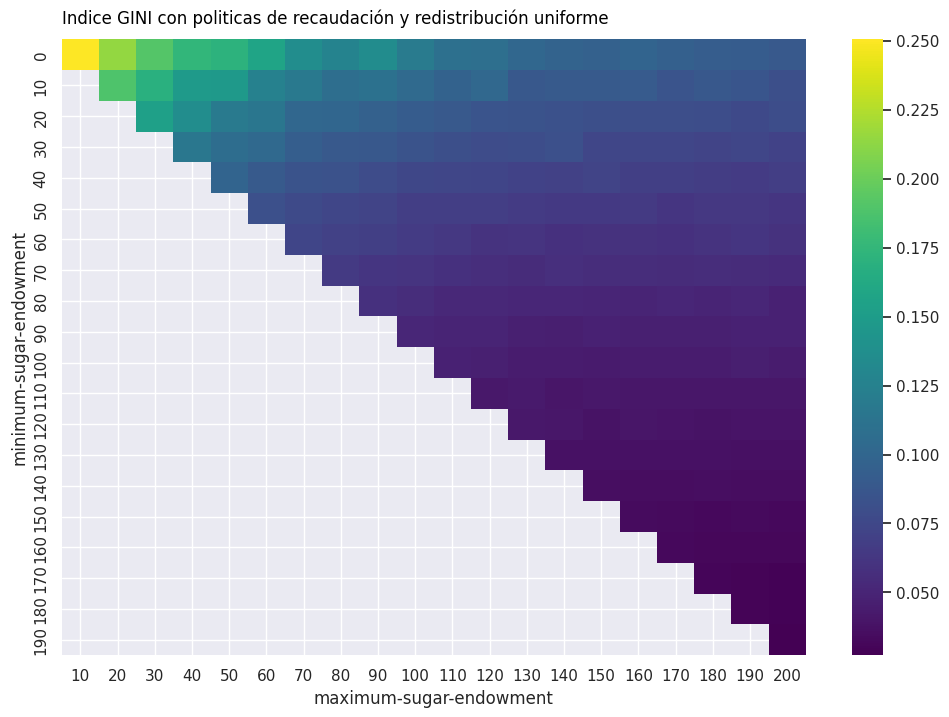

In [11]:
mapa_calor(df_uniforme,"avg-gini", "Indice GINI con politicas de recaudación y redistribución uniforme","figuras/Gini uniforme.png")

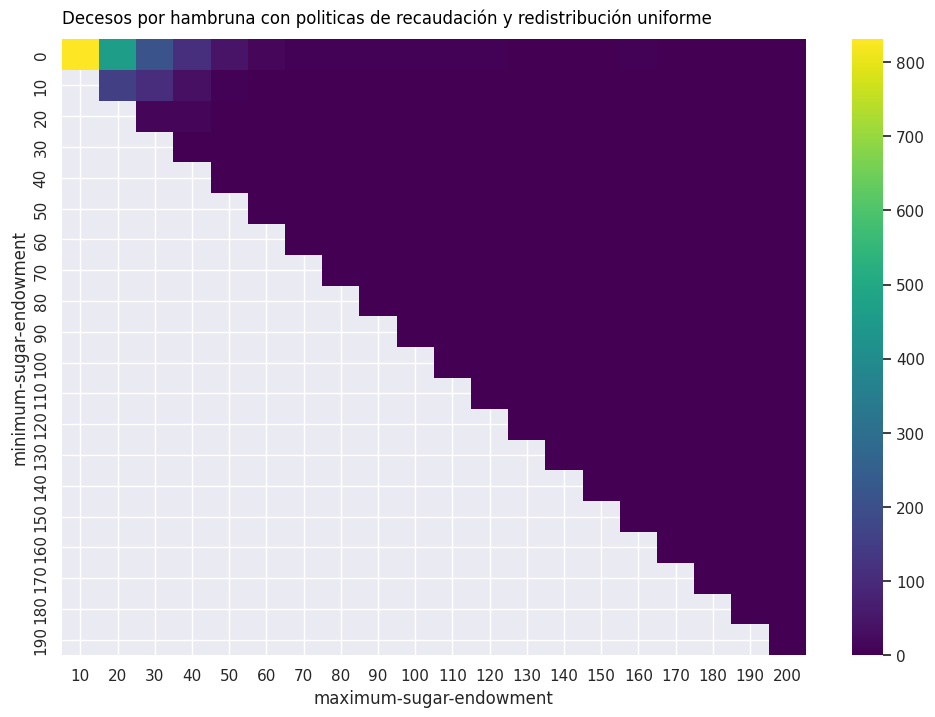

In [12]:
mapa_calor(df_uniforme,"starvation", "Decesos por hambruna con politicas de recaudación y redistribución uniforme","figuras/Hamburna uniforme.png")

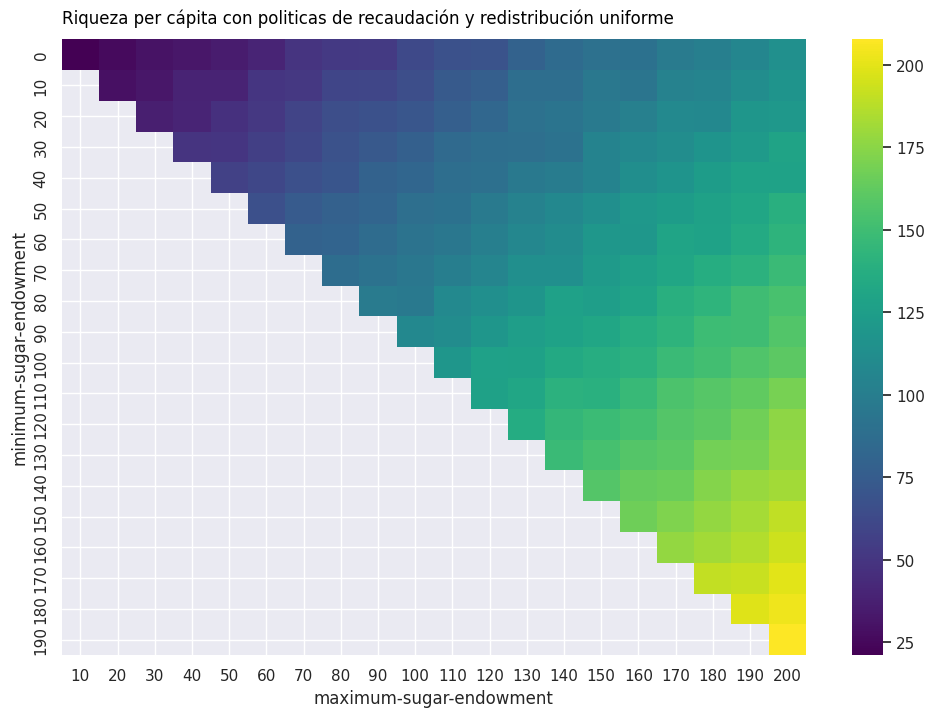

In [13]:
mapa_calor(df_uniforme,"avg-productivity", "Riqueza per cápita con politicas de recaudación y redistribución uniforme","figuras/Riqueza uniforme.png")

## Recaudación lineal y redistribución lineal
**Para este experimento, el cálculo de la aportación del agente tuvo la forma de .03 * el decil del agente. Así, aquellos agentes con decil 1 aportaron el 3% de su riqueza, mientras que el decil 10 aportó el 30%. La redistribución siguió un decaímiento lineal, de manera que los agentes con decil 1 recibieron la 9/45 parte de lo recaudado, el decil 2 la 8/45 parte y así en lo sucesivo.**

In [14]:
df_lineal = pd.read_csv('lineal/lineal.csv')
df_lineal.head()

,[run number],maximum-sugar-endowment,minimum-sugar-endowment,visualization,taxation,redistribution,initial-population,[step],avg-gini,starvation,avg-productivity,total-wealth
0,1,0,0,color-agents-by-decile,linear-collection,linear,400,0,0.027223,0,207.793875,83959
1,2,0,10,color-agents-by-decile,linear-collection,linear,400,0,0.000000,0,0.000000,0
2,3,0,20,color-agents-by-decile,linear-collection,linear,400,0,0.000000,0,0.000000,0
3,4,0,30,color-agents-by-decile,linear-collection,linear,400,0,0.027223,0,207.793875,83959
4,5,0,40,color-agents-by-decile,linear-collection,linear,400,0,0.000000,0,0.000000,0


In [15]:
df_lineal = limpiar_dataframe(df_lineal)
df_lineal

,maximum-sugar-endowment,minimum-sugar-endowment,avg-gini,starvation,avg-productivity,total-wealth
21,10,0,0.077766,473,22.103150,8682
42,20,0,0.075639,232,24.428550,9082
43,20,10,0.072985,0,26.215700,10099
63,30,0,0.076540,147,31.798125,11827
64,30,10,0.075388,0,33.893450,13195
...,...,...,...,...,...,...
435,200,150,0.081659,0,184.907925,74636
436,200,160,0.081612,0,191.201550,76513
437,200,170,0.082107,0,197.187075,79743
438,200,180,0.081767,0,203.454700,81915


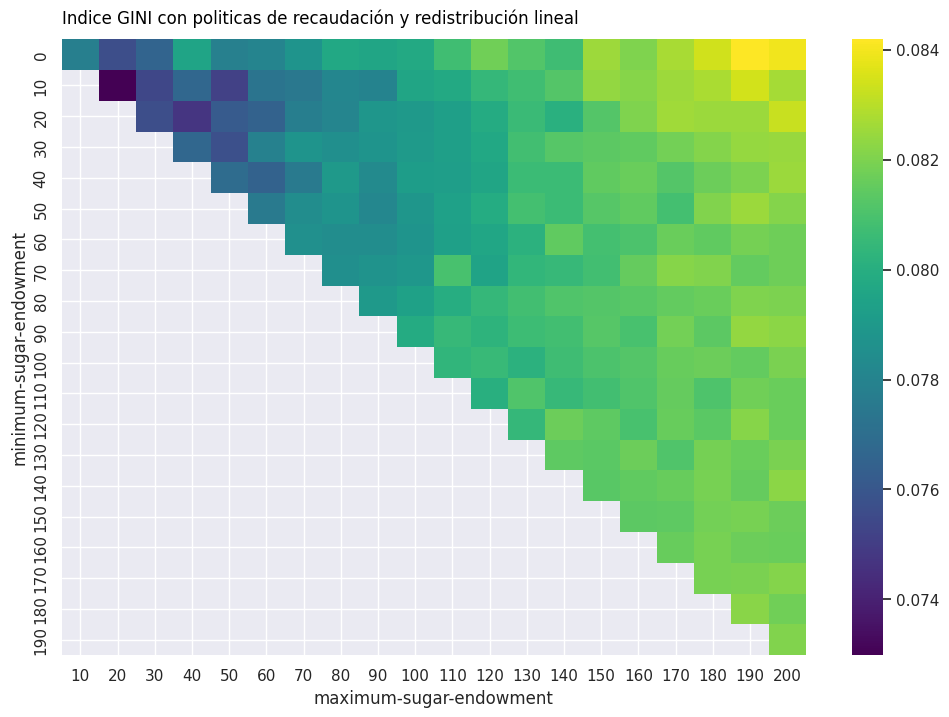

In [16]:
mapa_calor(df_lineal,"avg-gini", "Indice GINI con politicas de recaudación y redistribución lineal","figuras/Gini lineal.png")

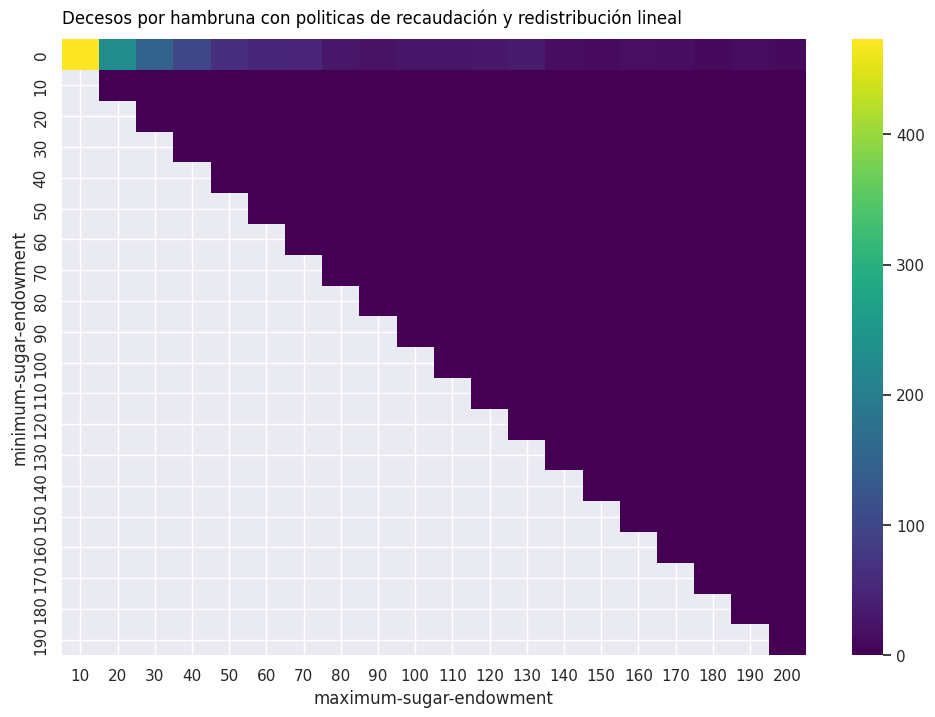

In [17]:
mapa_calor(df_lineal,"starvation", "Decesos por hambruna con politicas de recaudación y redistribución lineal","figuras/Hambruna lineal.png")

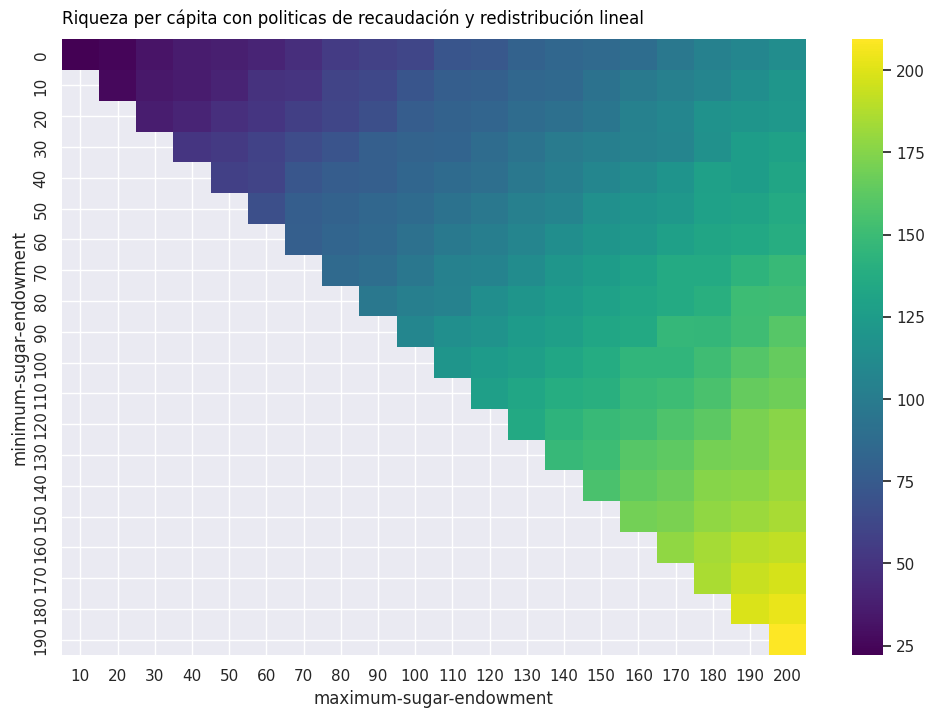

In [18]:
mapa_calor(df_lineal,"avg-productivity", "Riqueza per cápita con politicas de recaudación y redistribución lineal","figuras/Riqueza lineal.png")

## Recaudación lineal y redistribución dirigida
**La redistribución dirigida consiste en dirigir lo recaudado únicamente a aquellos agentes que se encuentren en los deciles 1 y 2. La recaudación lineal sigue la misma lógica descrita en el anterior experimento**

In [19]:
df_dirigidos = pd.read_csv('Dirigidos/lineal-dirigidos.csv')
df_dirigidos.head()

,[run number],maximum-sugar-endowment,minimum-sugar-endowment,visualization,taxation,redistribution,initial-population,[step],avg-gini,starvation,avg-productivity,total-wealth
0,1,0,0,color-agents-by-decile,linear-collection,poorest,400,0,0.081767,0,203.4547,81915
1,2,0,10,color-agents-by-decile,linear-collection,poorest,400,0,0.000000,0,0.0000,0
2,3,0,20,color-agents-by-decile,linear-collection,poorest,400,0,0.000000,0,0.0000,0
3,4,0,30,color-agents-by-decile,linear-collection,poorest,400,0,0.000000,0,0.0000,0
4,5,0,40,color-agents-by-decile,linear-collection,poorest,400,0,0.000000,0,0.0000,0


In [20]:
df_dirigidos = limpiar_dataframe(df_dirigidos)
df_dirigidos

,maximum-sugar-endowment,minimum-sugar-endowment,avg-gini,starvation,avg-productivity,total-wealth
21,10,0,0.151925,1184,7.363650,3275
42,20,0,0.175716,619,9.798775,3330
43,20,10,0.220640,76,11.805725,5168
63,30,0,0.248466,413,15.479125,5070
64,30,10,0.261780,12,18.164525,6528
...,...,...,...,...,...,...
435,200,150,0.201242,0,167.109850,63415
436,200,160,0.196441,0,176.504725,72424
437,200,170,0.203837,0,180.742425,74309
438,200,180,0.201897,0,181.041650,70123


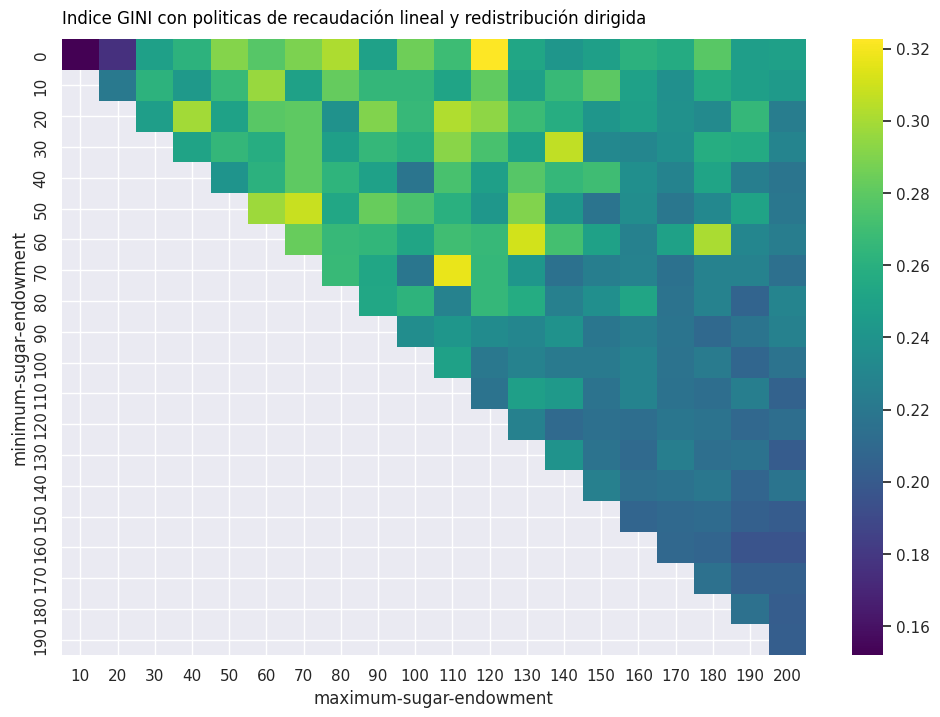

In [21]:
mapa_calor(df_dirigidos,"avg-gini", "Indice GINI con politicas de recaudación lineal y redistribución dirigida","figuras/Gini dirigido.png")

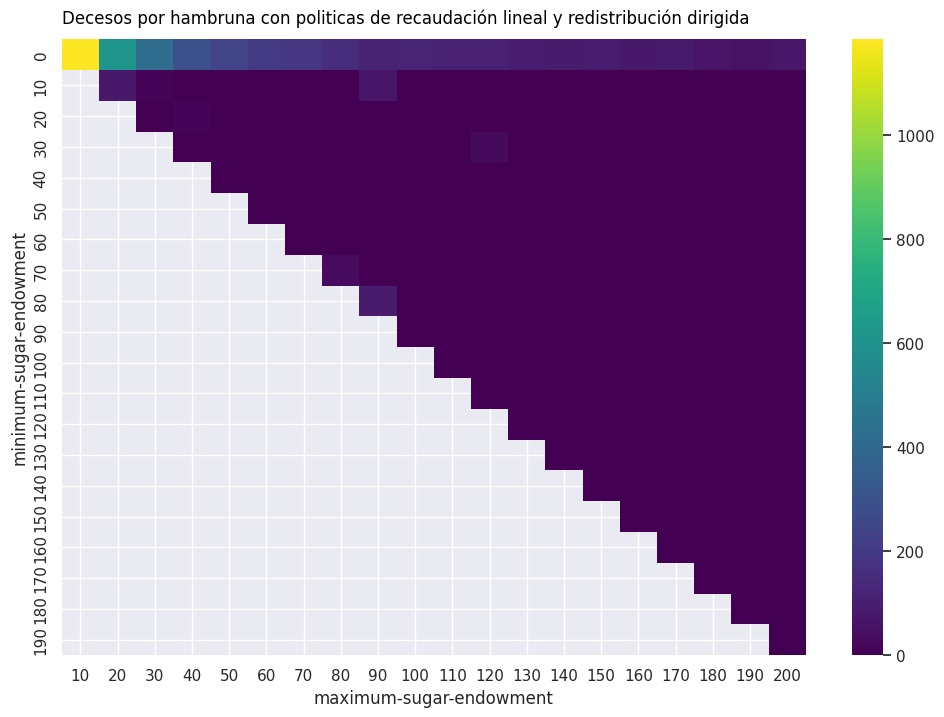

In [22]:
mapa_calor(df_dirigidos,"starvation", "Decesos por hambruna con politicas de recaudación lineal y redistribución dirigida","figuras/Hambruna dirigido.png")

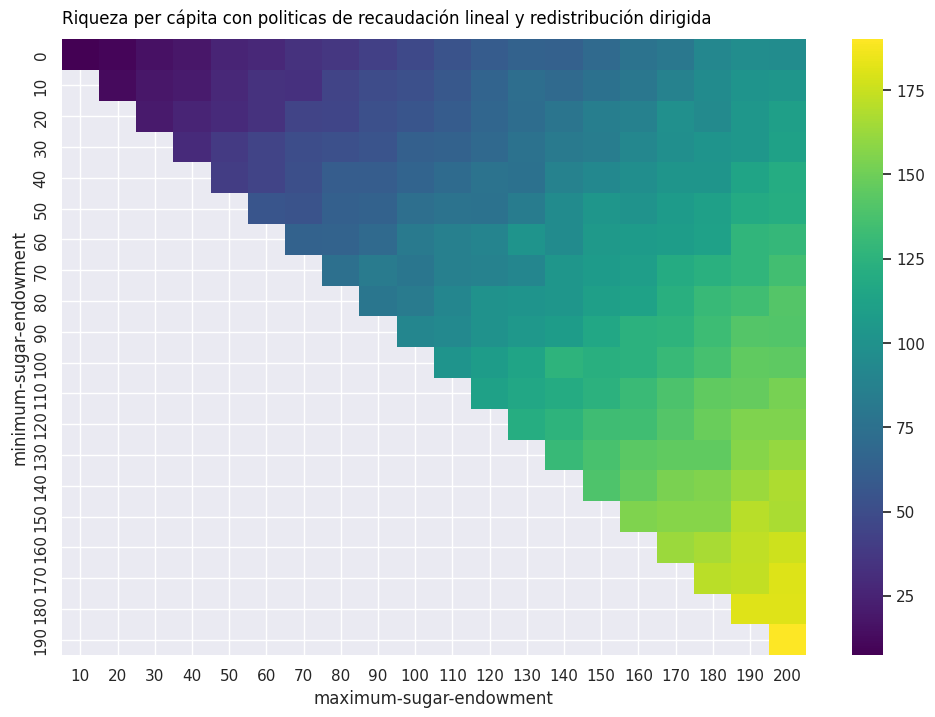

In [23]:
mapa_calor(df_dirigidos,"avg-productivity", "Riqueza per cápita con politicas de recaudación lineal y redistribución dirigida","figuras/Riqueza dirigido.png")

## Recaudación dinámica y redistribución dinámica
**La recaudación dinámica consistió en calcular el porcentaje de riqueza de cada decil y recaudar lo proporcional a este porcentaje. Si de manera colectiva el decil 10 tenía el 30% de la riqueza total, de manera individual los agentes aportaban el 30% de su riqueza. Ésta lógica se aplicó a todos los agentes según su decil. La redistribución siguió una lógica inversamente proporcional a la recuadación. Si el decil 10 tenía un 30% de la riqueza total, el 30% de lo recaudado se dirigía al decil 1, si el decil 9 tenía el 20%, el 20% de lo recaudado se dirigía al decil 2 y así sucesivamente.**

In [24]:
df_dinamico = pd.read_csv('Dinamico/dinamico.csv')
df_dinamico.head()

,[run number],maximum-sugar-endowment,minimum-sugar-endowment,visualization,taxation,redistribution,initial-population,[step],avg-gini,starvation,avg-productivity,total-wealth
0,1,0,0,color-agents-by-decile,dynamic-collection,dynamic,400,0,0.202422,0,190.077225,77451
1,2,0,10,color-agents-by-decile,dynamic-collection,dynamic,400,0,0.000000,0,0.000000,0
2,3,0,20,color-agents-by-decile,dynamic-collection,dynamic,400,0,0.000000,0,0.000000,0
3,4,0,30,color-agents-by-decile,dynamic-collection,dynamic,400,0,0.000000,0,0.000000,0
4,5,0,40,color-agents-by-decile,dynamic-collection,dynamic,400,0,0.000000,0,0.000000,0


In [25]:
df_dinamico = limpiar_dataframe(df_dinamico)
df_dinamico

,maximum-sugar-endowment,minimum-sugar-endowment,avg-gini,starvation,avg-productivity,total-wealth
21,10,0,0.111698,681,17.453475,7202
42,20,0,0.096829,560,19.827925,8639
43,20,10,0.082209,0,24.153900,9615
63,30,0,0.087423,161,23.187275,9428
64,30,10,0.080916,0,30.648275,12782
...,...,...,...,...,...,...
435,200,150,0.036220,0,191.530700,76288
436,200,160,0.038562,0,191.514275,77614
437,200,170,0.036712,0,197.105675,78835
438,200,180,0.037035,0,203.763700,81634


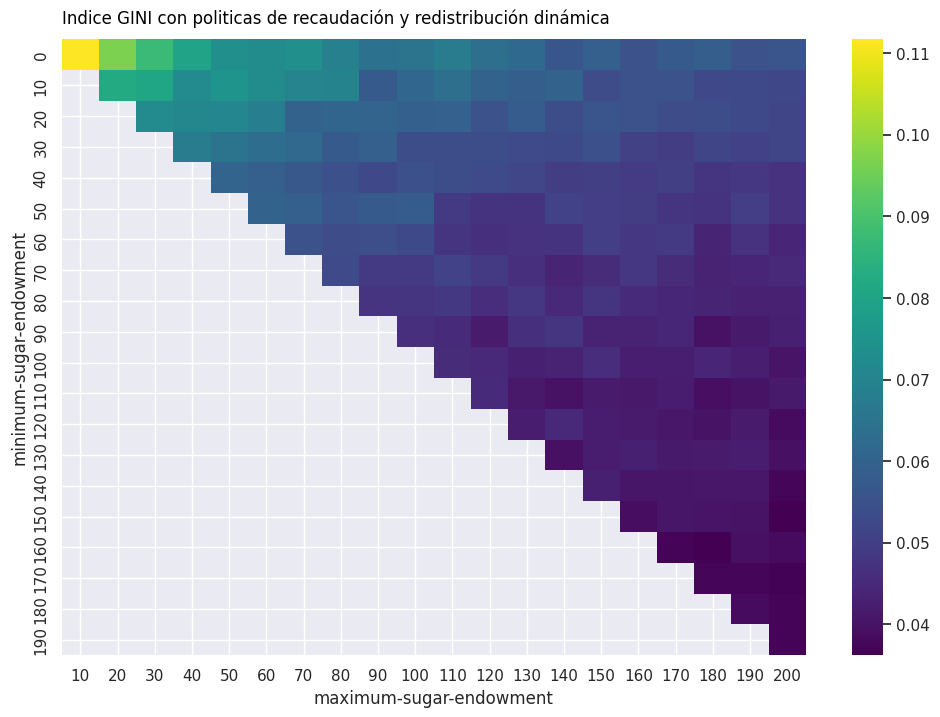

In [26]:
mapa_calor(df_dinamico,"avg-gini", "Indice GINI con politicas de recaudación y redistribución dinámica","figuras/Gini dinámica.png")

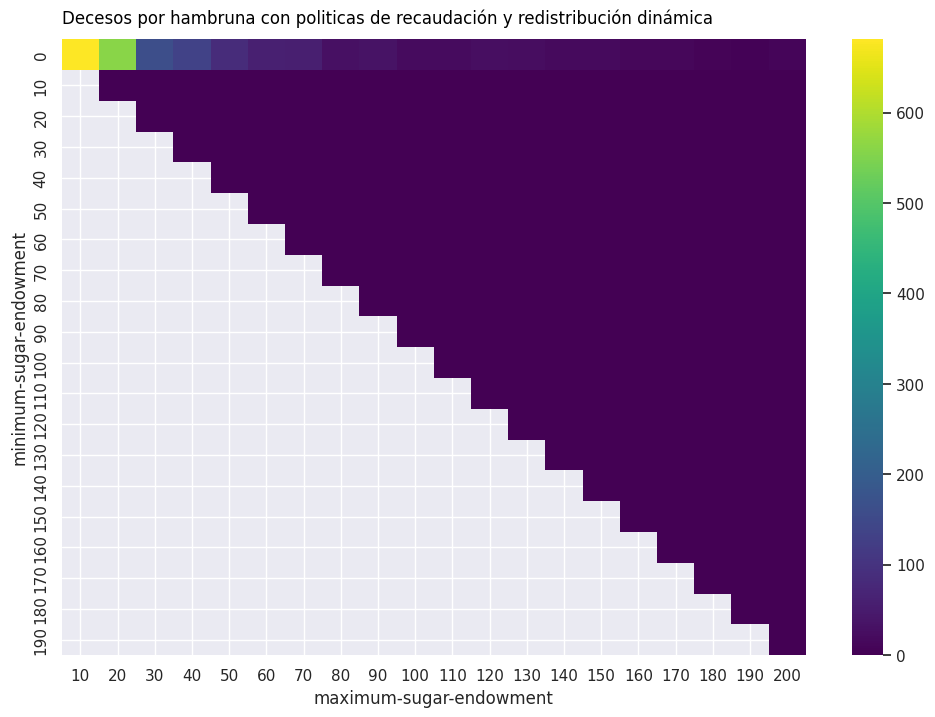

In [27]:
mapa_calor(df_dinamico,"starvation", "Decesos por hambruna con politicas de recaudación y redistribución dinámica","figuras/Hambruna dinámica.png")

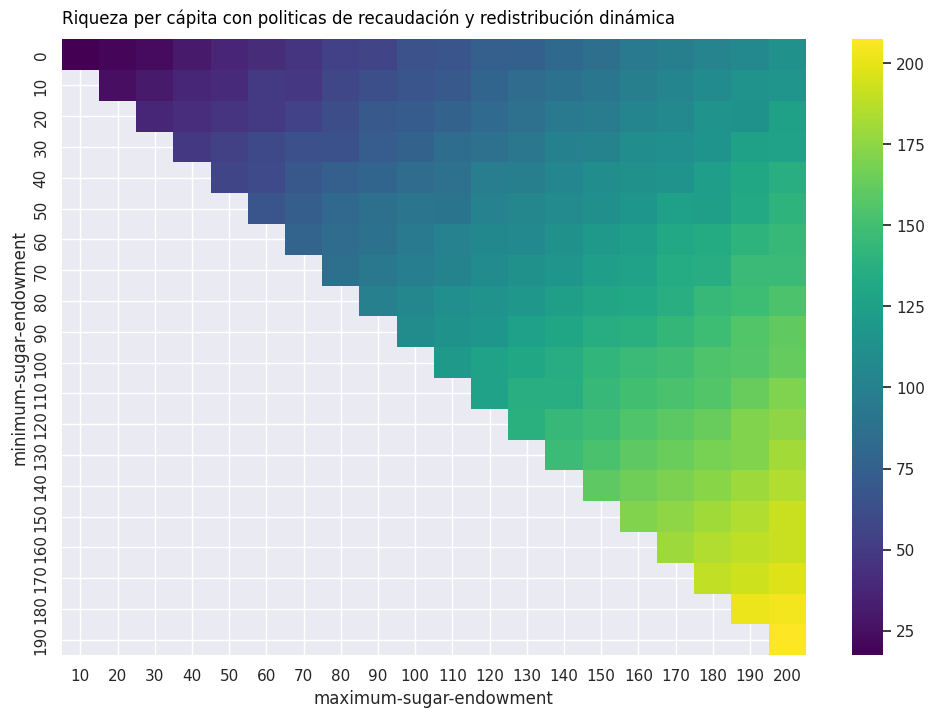

In [28]:
mapa_calor(df_dinamico,"avg-productivity", "Riqueza per cápita con politicas de recaudación y redistribución dinámica","figuras/Riqueza dinámica.png")